## 넘파이로 데이터 준비

In [10]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [14]:
import numpy as np

In [15]:
np.column_stack(([1,2,3], [4,5,6]))
# 두 배열을 열 방향으로 연결하여 새로운 배열을 생성한다

array([[1, 4],
       [2, 5],
       [3, 6]])

In [16]:
fish_data = np.column_stack((fish_length, fish_weight))

In [17]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [18]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [19]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
# concatenate 넘파이에서 배열을 합치는데 사용하는 함수
# 35개의 1이 포함된 배열 & 14개의 0이 포함된 배열

In [20]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

In [23]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [24]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [25]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [26]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [27]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 수상한 도미 한마리

In [28]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [29]:
print(kn.predict([[25, 150]]))

[0.]


In [30]:
import matplotlib.pyplot as plt

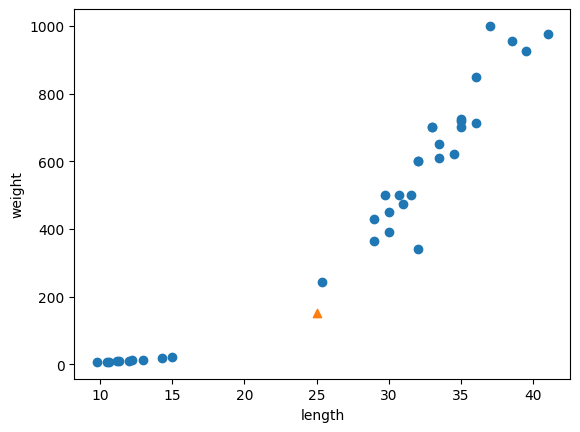

In [31]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [32]:
distances, indexes = kn.kneighbors([[25, 150]])

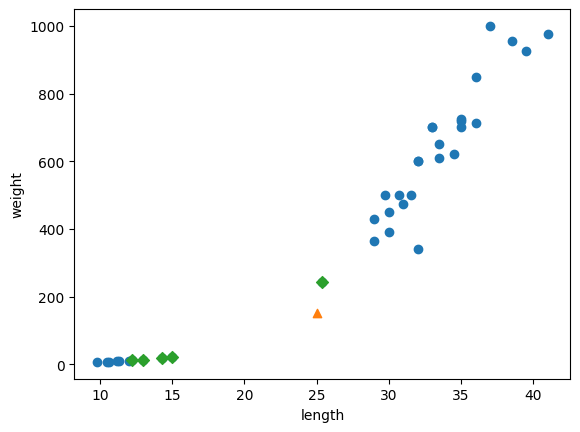

In [33]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [34]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [35]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [36]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


## 기준을 맞춘다

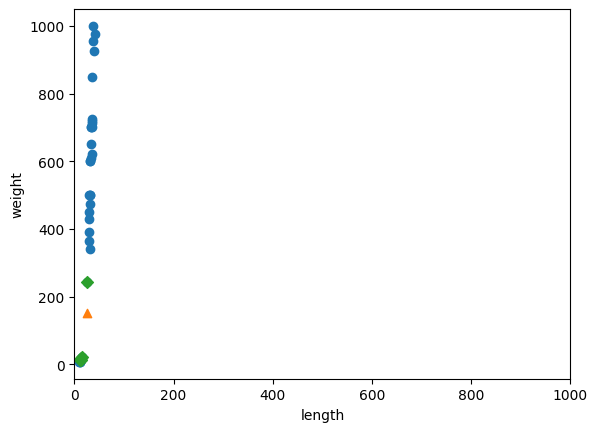

In [37]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [38]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [39]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [40]:
train_scaled = (train_input - mean) / std

## 전처리 데이터로 모델 훈련하기

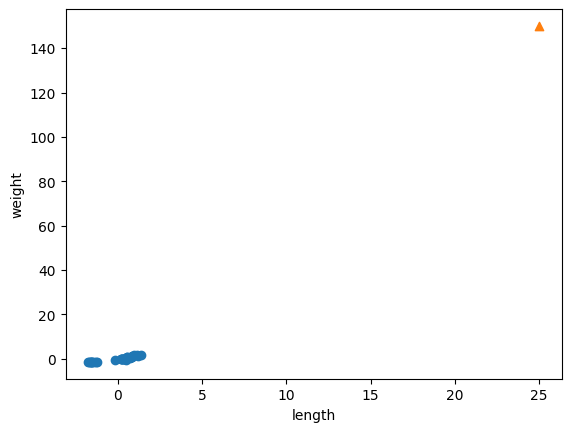

In [41]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [42]:
new = ([25, 150] - mean) / std

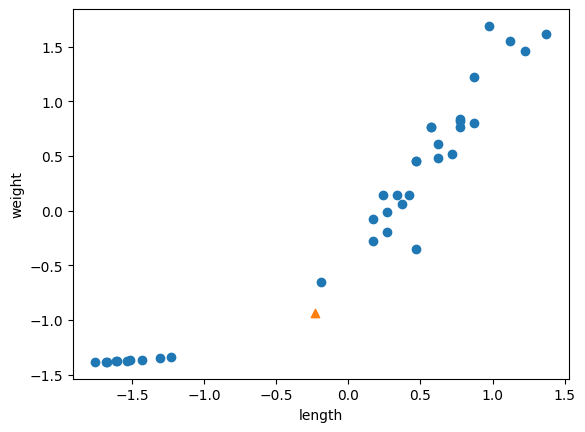

In [43]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [44]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

KNeighborsClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.

On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [45]:
test_scaled = (test_input - mean) / std

In [46]:
kn.score(test_scaled, test_target)

1.0

In [47]:
print(kn.predict([new]))

[1.]


In [48]:
distances, indexes = kn.kneighbors([new])

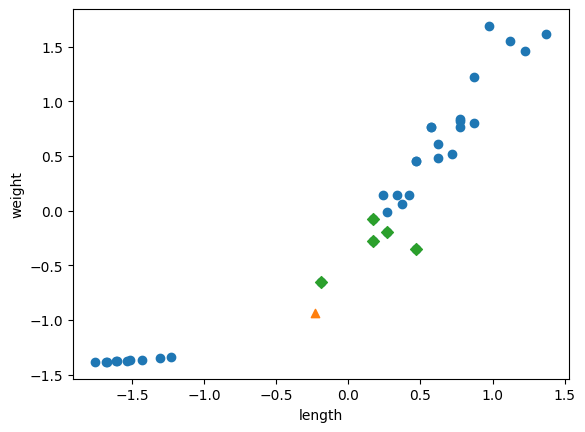

In [49]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 확인문제

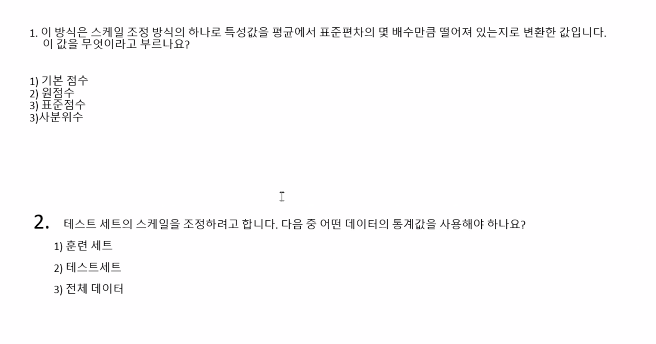

1. 4
2. 2